<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

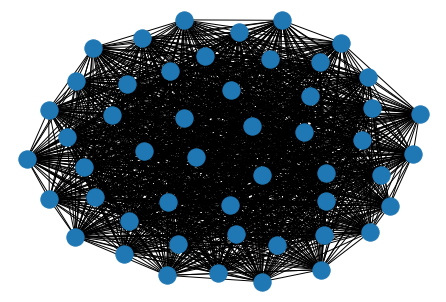

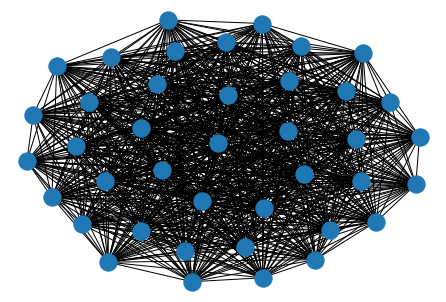

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 50 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = 1 #Probabibilty for Node Connection in random graph
PP = 1
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
#!jupyter notebook --generate-config

In [3]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [4]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [5]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]
[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


In [6]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [7]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [8]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [9]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [10]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])/2})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        PN=(1/(Node[cur][2]['I'] + 1))
                        P = 100-PN 
                        #print(P)
                        #print(PN)
                        next = random.choices(neighbors,weights=(P,PN/2,PN/2), k=1)[0] 
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(P,PN), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(100), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      PN1=(1/(Node[cur][2]['I'] + 1))
                      P1 = 100-PN1  
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(P1,PN1/2,PN1/2),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #Node_next[nex][0]['Viral_load']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] < .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [11]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [12]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9822, 9640, 9423, 9209, 9037, 8918, 8837, 8757, 8669, 8592, 8541, 8492, 8444, 8405, 8371, 8340, 8311, 8287, 8274, 8266, 8257, 8244, 8230, 8218, 8203, 8188, 8180, 8173, 8169, 8165, 8163, 8161, 8158, 8155, 8152, 8150, 8149, 8149, 8149, 8149, 8149, 8149, 8149, 8149]
[178, 360, 577, 791, 963, 1082, 1163, 1065, 971, 831, 668, 545, 474, 432, 386, 329, 281, 254, 218, 178, 148, 127, 110, 93, 84, 86, 86, 84, 75, 65, 55, 42, 30, 25, 21, 19, 16, 14, 12, 9, 6, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 360, 577, 791, 963, 1082, 1163, 1243, 1331, 1408, 1459, 1508, 1556, 1595, 1629, 1660, 1689, 1713, 1726, 1734, 1743, 1756, 1770, 1782, 1797, 1812, 1820, 1827, 1831, 1835, 1837, 1839, 1842, 1845, 1848, 1850, 1851]
[[], [9822, 9640, 9423, 9209, 9037, 8918, 8837, 8757, 8669, 8592, 8541, 8492, 8444, 8405, 8371, 8340, 8311, 8287, 8274, 8266, 8257, 8244, 8230, 8218, 8203, 8188, 8180, 8173, 8169, 8165, 8163, 8161, 8158, 8155, 8152, 8150, 8149, 8149, 8149, 8149, 8149, 8149, 8149, 8149]]
[[], [178, 360, 577, 791, 9

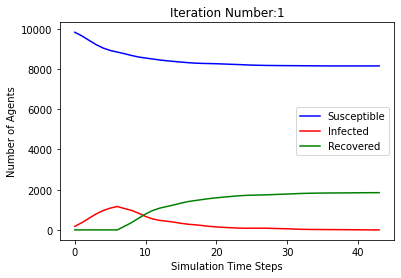

[9822, 9628, 9366, 9111, 8942, 8850, 8790, 8737, 8657, 8582, 8503, 8442, 8373, 8309, 8267, 8227, 8190, 8160, 8139, 8112, 8091, 8069, 8046, 8025, 8008, 7991, 7978, 7969, 7962, 7957, 7953, 7945, 7941, 7931, 7923, 7914, 7904, 7897, 7892, 7888, 7887, 7887, 7885, 7885, 7885, 7883, 7883, 7882, 7881, 7881, 7881, 7881, 7881, 7881, 7881, 7881]
[178, 372, 634, 889, 1058, 1150, 1210, 1085, 971, 784, 608, 500, 477, 481, 470, 430, 392, 343, 303, 261, 218, 198, 181, 165, 152, 148, 134, 122, 107, 89, 72, 63, 50, 47, 46, 48, 53, 56, 53, 53, 44, 36, 29, 19, 12, 9, 5, 5, 6, 4, 4, 4, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 372, 634, 889, 1058, 1150, 1210, 1263, 1343, 1418, 1497, 1558, 1627, 1691, 1733, 1773, 1810, 1840, 1861, 1888, 1909, 1931, 1954, 1975, 1992, 2009, 2022, 2031, 2038, 2043, 2047, 2055, 2059, 2069, 2077, 2086, 2096, 2103, 2108, 2112, 2113, 2113, 2115, 2115, 2115, 2117, 2117, 2118, 2119]
[[], [9822, 9640, 9423, 9209, 9037, 8918, 8837, 8757, 8669, 8592, 8541, 8492, 8444, 8405, 8371, 8340, 83

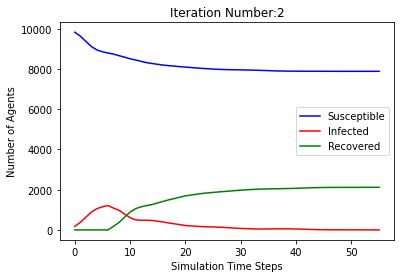

[9822, 9616, 9361, 9125, 8933, 8840, 8755, 8693, 8632, 8569, 8521, 8482, 8449, 8414, 8388, 8364, 8341, 8318, 8303, 8291, 8279, 8274, 8267, 8265, 8263, 8257, 8254, 8249, 8243, 8234, 8232, 8232, 8232, 8232, 8231, 8230, 8230, 8229, 8229, 8228, 8227, 8227, 8227, 8227, 8227, 8227, 8227, 8226, 8225, 8225, 8224, 8222, 8222, 8221, 8221, 8221, 8221, 8221, 8221, 8221, 8221]
[178, 384, 639, 875, 1067, 1160, 1245, 1129, 984, 792, 604, 451, 391, 341, 305, 268, 228, 203, 179, 158, 135, 114, 97, 76, 55, 46, 37, 30, 31, 33, 33, 31, 25, 22, 18, 13, 4, 3, 3, 4, 5, 4, 3, 3, 2, 2, 1, 1, 2, 2, 3, 5, 5, 6, 5, 4, 4, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 384, 639, 875, 1067, 1160, 1245, 1307, 1368, 1431, 1479, 1518, 1551, 1586, 1612, 1636, 1659, 1682, 1697, 1709, 1721, 1726, 1733, 1735, 1737, 1743, 1746, 1751, 1757, 1766, 1768, 1768, 1768, 1768, 1769, 1770, 1770, 1771, 1771, 1772, 1773, 1773, 1773, 1773, 1773, 1773, 1773, 1774, 1775, 1775, 1776, 1778, 1778, 1779]
[[], [9822, 9640, 9423, 9209, 9037, 8918, 883

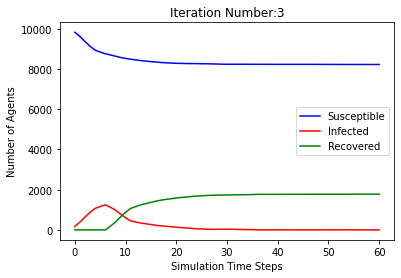

[9822, 9669, 9437, 9173, 8982, 8863, 8772, 8699, 8625, 8551, 8479, 8417, 8368, 8321, 8284, 8253, 8229, 8201, 8172, 8148, 8135, 8114, 8097, 8082, 8070, 8066, 8065, 8063, 8057, 8053, 8047, 8040, 8035, 8034, 8033, 8032, 8031, 8030, 8024, 8019, 8018, 8018, 8014, 8013, 8013, 8013, 8013, 8013, 8013, 8013, 8013]
[178, 331, 563, 827, 1018, 1137, 1228, 1123, 1044, 886, 694, 565, 495, 451, 415, 372, 322, 278, 245, 220, 186, 170, 156, 147, 131, 106, 83, 72, 57, 44, 35, 30, 31, 31, 30, 25, 22, 17, 16, 16, 16, 15, 18, 18, 17, 11, 6, 5, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 331, 563, 827, 1018, 1137, 1228, 1301, 1375, 1449, 1521, 1583, 1632, 1679, 1716, 1747, 1771, 1799, 1828, 1852, 1865, 1886, 1903, 1918, 1930, 1934, 1935, 1937, 1943, 1947, 1953, 1960, 1965, 1966, 1967, 1968, 1969, 1970, 1976, 1981, 1982, 1982, 1986, 1987]
[[], [9822, 9640, 9423, 9209, 9037, 8918, 8837, 8757, 8669, 8592, 8541, 8492, 8444, 8405, 8371, 8340, 8311, 8287, 8274, 8266, 8257, 8244, 8230, 8218, 8203, 8188, 8180, 8173, 8169, 

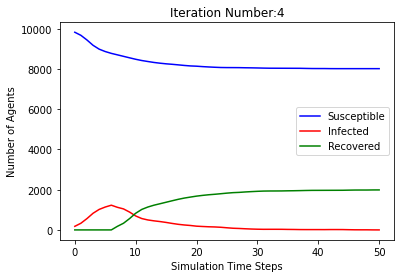

[9822, 9632, 9397, 9155, 8977, 8891, 8822, 8761, 8717, 8659, 8608, 8562, 8525, 8482, 8446, 8420, 8396, 8371, 8354, 8342, 8331, 8323, 8318, 8312, 8304, 8296, 8289, 8288, 8288, 8288, 8287, 8287, 8285, 8285, 8283, 8281, 8276, 8275, 8275, 8275, 8275, 8275, 8275, 8275, 8275]
[178, 368, 603, 845, 1023, 1109, 1178, 1061, 915, 738, 547, 415, 366, 340, 315, 297, 263, 237, 208, 183, 151, 123, 102, 84, 67, 58, 53, 43, 35, 30, 25, 17, 11, 4, 5, 7, 12, 12, 12, 10, 10, 8, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 368, 603, 845, 1023, 1109, 1178, 1239, 1283, 1341, 1392, 1438, 1475, 1518, 1554, 1580, 1604, 1629, 1646, 1658, 1669, 1677, 1682, 1688, 1696, 1704, 1711, 1712, 1712, 1712, 1713, 1713, 1715, 1715, 1717, 1719, 1724, 1725]
[[], [9822, 9640, 9423, 9209, 9037, 8918, 8837, 8757, 8669, 8592, 8541, 8492, 8444, 8405, 8371, 8340, 8311, 8287, 8274, 8266, 8257, 8244, 8230, 8218, 8203, 8188, 8180, 8173, 8169, 8165, 8163, 8161, 8158, 8155, 8152, 8150, 8149, 8149, 8149, 8149, 8149, 8149, 8149, 8149], [9822, 9628

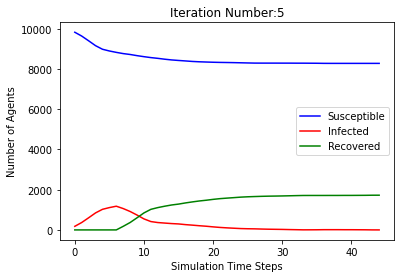

In [13]:
#from numpy import zeros, linspace
#Node_p=Node.copy()
#Node_n=Node.copy() 
#Agent_p=Agent.copy()
#Agent_n=Agent.copy()
#print(Node_p)
#print(Agent_p)
#S,I,R = Count_SIR_Node(Node_n) 
#S1,I1,R1 = Count_SIR_Agent(Agent_n)
#print([S,I,R]) 
#print([S1,I1,R1])
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(5):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    #count=0
    #for i in range(len(Node_p)):
    #  count+=len(Node_p[i]) - 4
    #print(count)
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    #S1,I1,R1 = Count_SIR_Agent(Agent_n)
    #print("Simulation No:",i+1, "Iteration No: ", j)
    #print(Node_n)
    #print(Agent_n)
    #print([Sj,Ij,Rj]) 
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #print([S1,I1,R1])
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()    

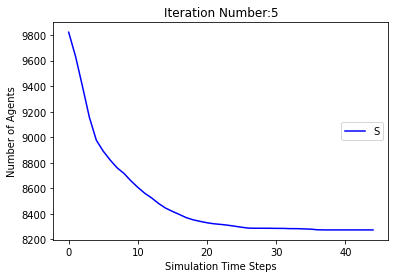

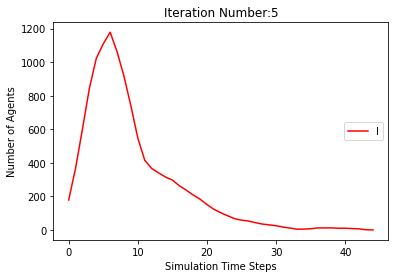

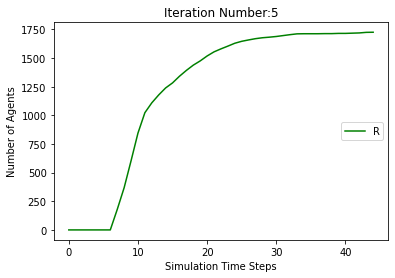

In [14]:
plt.plot(T, S, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Iteration Number:'+str(i+1))
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(T, I, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Iteration Number:'+str(i+1))
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(T, R, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Iteration Number:'+str(i+1))
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()

In [15]:
print(len(SS[1]))

44


In [16]:
print(len(SS[2]))

56
